In [87]:
# berbagi file adalah dengan memasang Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import librry yg akan kita gunakan
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer



In [5]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

In [6]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [7]:
tokenizer.fit_on_texts(teks)

In [8]:
sequences = tokenizer.texts_to_sequences(teks)

In [9]:
print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


In [10]:


from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)



In [11]:
print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


In [12]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

In [13]:


print(sequences_samapanjang)



[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 8  9 10 11 12]]


In [14]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

In [15]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 7  8  9 10 11]]




2.2. Tokenisasi menggunakan NLTK


In [16]:
# Installing Modules for Google Colab
!pip install unidecode
!pip install pyLDAvis
!pip install textblob
!pip install sastrawi
!pip install twython
!pip install tweepy
!pip install spacy
!pip install python-crfsuite
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm
import nltk
nltk.download('popular')

     |████████████████████████████████| 235 kB 5.1 MB/s 
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 204 kB/s 
     |████████████████████████████████| 15.7 MB 190 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b1f291075d927a37f8b947819c181d098b20ba36f146a47d2a20581db78db0f3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERRO

     |████████████████████████████████| 209 kB 5.1 MB/s 
     |████████████████████████████████| 743 kB 5.0 MB/s 
     |████████████████████████████████| 12.0 MB 4.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 3.7 MB 5.2 MB/s 
  Created wheel for xx-ent-wiki-sm: filename=xx_ent_wiki_sm-2.2.0-py3-none-any.whl size=3732134 sha256=734c2ff624b2a01cc253da3b5b1146f63601a837922e7967a9c65e92a13f77cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-1w6ry1lo/wheels/87/31/20/7f7576bcd0b6ee9c7056c60e28d9e6a40143c553cb5fecc9e2
Successfully built xx-ent-wiki-sm
✔ Download and installation successful
You can now load the model via spacy.load('xx_ent_wiki_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/xx_en

True

In [17]:
T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
Word_Tokens = nltk.word_tokenize(T)
print(Word_Tokens) # tokenisasi kata

['Hello', ',', 'Mr.', 'Man', '.', 'He', 'smiled', '!', '!', 'This', ',', 'i.e', '.', 'that', ',', 'is', 'it', '.']


In [18]:
# Bandingkan jika menggunakan fungsi split di Python, apakah bedanya? 
print(T.split())
# Apakah kesimpulan yang bisa kita tarik?

['Hello,', 'Mr.', 'Man.', 'He', 'smiled!!', 'This,', 'i.e.', 'that,', 'is', 'it.']


In [17]:
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens) # Tokenisasi kalimat
# Perhatikan hasilnya, ada berapa kalimat yang di deteksi? setuju?

['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


In [19]:
#Word Tokenizing menggunakan NLTK

T = "how are you\n are you okay?"
print(T)
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens)




how are you
 are you okay?
['how are you\n are you okay?']




Tokenizing spacy telah menyediakan model khusus bahasa indonesia dan bahasa inggris


In [27]:
# Contoh pembuatan Tokenisasi dalam bahasa Indonesia dengan Spacy

from spacy.lang.id import Indonesian
nlp_id = Indonesian()  # Language Model

teks = 'Sore itu, Hamzah melihat kupu-kupu di taman. Ibu membeli oleh-oleh di pasar'
tokenS_id = nlp_id(teks)
#T = []
#for token in tokenS_id:
#    T.append(token)
print([t for t in tokenS_id])

[Sore, itu, ,, Hamzah, melihat, kupu-kupu, di, taman, ., Ibu, membeli, oleh-oleh, di, pasar]


In [28]:


from spacy.tokenizer import Tokenizer
nlp_id = Indonesian()  
tokenizer = Tokenizer(nlp_id.vocab)

tokenS_id = tokenizer(teks)
print("Blank Tokenizer : ",[t for t in tokenS_id])

Blank Tokenizer :  [Sore, itu,, Hamzah, melihat, kupu-kupu, di, taman., Ibu, membeli, oleh-oleh, di, pasar]


In [29]:
# Jika menggunakan Language model English
#membandingkan jika modelnya menggunakan bahasa inggris, maka  modelnya tidak mengenali tanda baca seperti kata hubung dalam bahasa indonesia dalam kata orang-orang
from spacy.lang.en import English
nlp_en = English()
tokenS_en = nlp_en(teks)
print([token.text for token in tokenS_en])

['Sore', 'itu', ',', 'Hamzah', 'melihat', 'kupu', '-', 'kupu', 'di', 'taman', '.', 'Ibu', 'membeli', 'oleh', '-', 'oleh', 'di', 'pasar']


Data Audio


Sinyal audio adalah sinyal yang bergetar dalam rentang frekuensi yang dapat didengar.

librosa adalah paket python untuk analisis musik dan audio. Ini menyediakan blok bangunan yang diperlukan untuk membuat sistem pencarian informasi musik. Librosa membantu memvisualisasikan sinyal audio dan juga melakukan ekstraksi fitur di dalamnya menggunakan teknik pemrosesan sinyal yang berbeda.

Dengan librosa file audio dimuat sebagai deret waktu floating point. Audio akan secara otomatis disampel ulang ke tingkat yang diberikan (default sr=22050)

In [60]:
import librosa
audio_data = '/content/drive/MyDrive/Data Mining/AMV Durasi 1 menit TakeOver.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


In [61]:
librosa.load(audio_data, sr=44100)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [62]:
#menampilkan dan memutar file audio di notebook dapat menggunakan IPython.display

import IPython.display as ipd
ipd.Audio(audio_data)





Sinyal sebagai urutan variasi dalam kuantitas tertentu sehubungan dengan adanya waktu (untuk sinyal audio yang kuantitasnya adalah tekanan udara).

Visualisasi Data Audio dengan Waveplot, digunakan untuk memplot bentuk gelombang alami dari audio tiap waktunya,


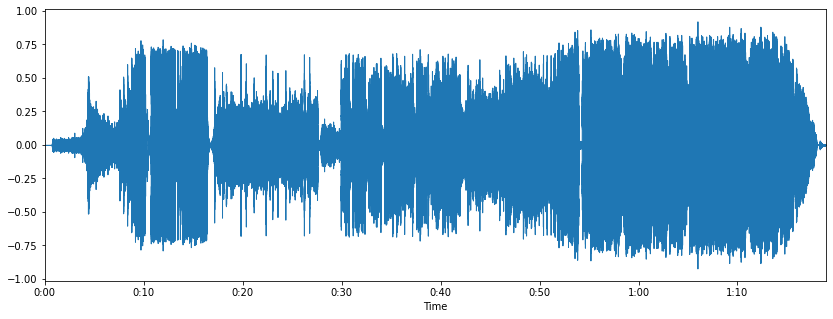

In [63]:
#Sinyal hanyalah urutan variasi dalam kuantitas tertentu sehubungan dengan waktu (untuk sinyal audio yang kuantitasnya adalah tekanan udara). Sekarang kita akan mencoba menangkap pemahaman ini secara digital.

#Visualisasi Data Audio dengan Waveplot, digunakan untuk memplot bentuk gelombang alami dari audio tiap waktunya,


%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)





Spektogram adalah representasi visual dari spektrum frekuensi yang berbeda untuk tiap waktu.



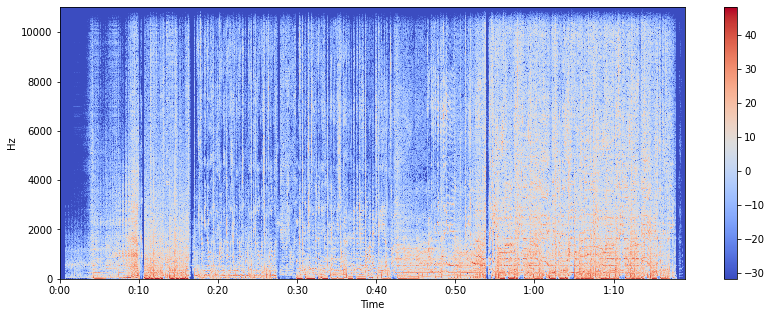

In [64]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

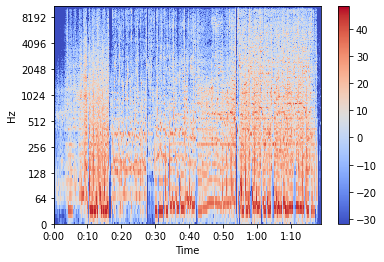

In [65]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Membuat signal audio

In [66]:


import numpy as np
# sample rate (laju sample)
sr = 22050 
# detik
T = 6.0    
# time variable
t = np.linspace(0, T, int(T*sr), endpoint=False) 
# Gelombang sinus murni pada 220 Hz
x = 0.5*np.sin(2*np.pi*220*t)
#Memutar audio
ipd.Audio(x, rate=sr)



menyimpan audio salah satu caranya dapat menggunakan soundfiles

In [67]:
import soundfile as sf
#Saving the audio
sf.write('tone_220.wav', x, sr)




Ekstraksi fitur dari sinyal Audio

Setiap sinyal audio terdiri dari banyak fitur. Namun, kita harus mengekstrak karakteristik yang relevan dengan masalah yang kita coba pecahkan.

fitur spektral (frekuensi berbasis fitur), yang diperoleh dengan mengkonversi sinyal berbasis waktu menjadi domain frekuensi menggunakan Fourier Transform, seperti frekuensi dasar, komponen frekuensi, spektral massa, spektral fluks, spektral density, spektral roll-off, dll.

1.Spectral Centroid (SC) mengukur posisi dan bentuk spektral dari titik keseimbangan distribusi energi. Secara sederhana spectral centroid disebut gravitasi dari spektrum.


Spectral Centroid (SC) mengukur posisi dan bentuk spektral dari titik keseimbangan distribusi energi. Secara sederhana spectral centroid disebut gravitasi dari spektrum.

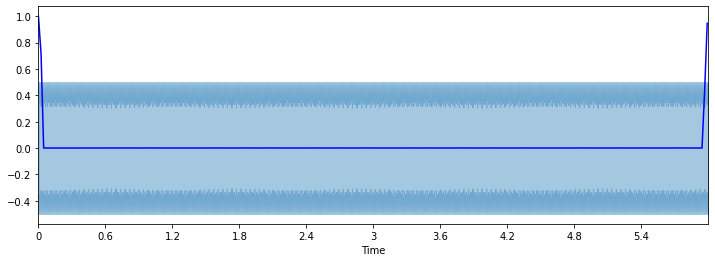

In [68]:


import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

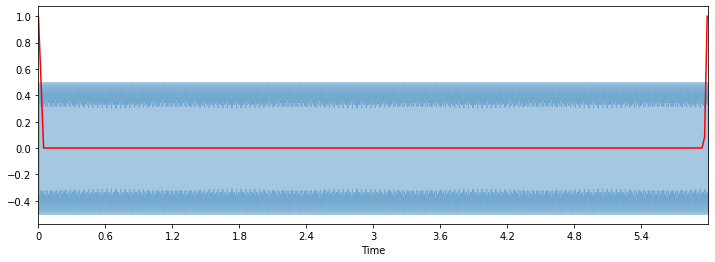

In [69]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')




Bandwidth spektral didefinisikan sebagai lebar pita cahaya pada setengah puncak maksimum (atau lebar penuh pada setengah maksimum [FWHM]) dan diwakili oleh dua garis merah vertikal dan λSB pada sumbu panjang gelombang.

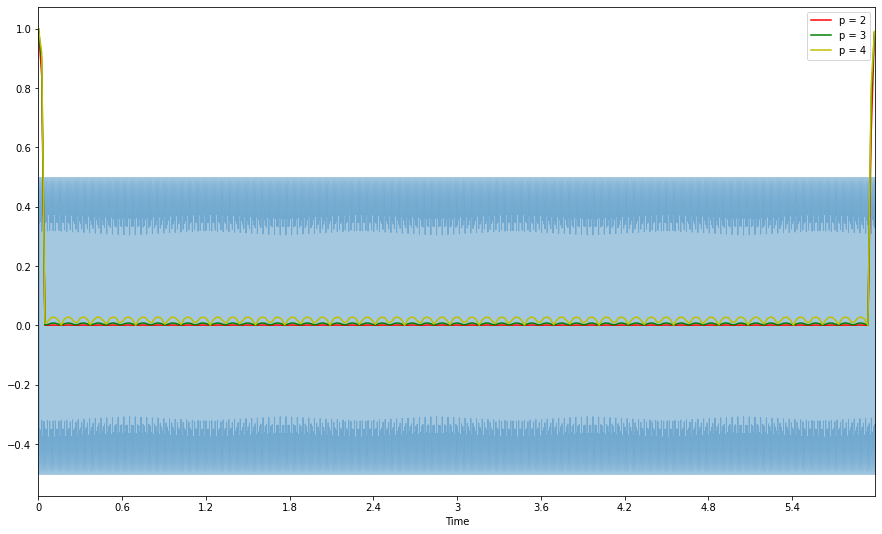

In [70]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

Zero-Crossing Rate
salah satu Cara yang sangat sederhana untuk mengukur kelancaran sinyal adalah dengan menghitung jumlah zero-crossing dalam segmen sinyal tersebut. Sinyal suara berosilasi perlahan — misalnya, sinyal 100 Hz akan melewati nol 100 per detik — sedangkan frikatif tak bersuara dapat memiliki 3000 nol penyeberangan per detik. Biasanya memiliki nilai yang lebih tinggi untuk suara yang sangat perkusi seperti yang ada di metal dan rock.

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


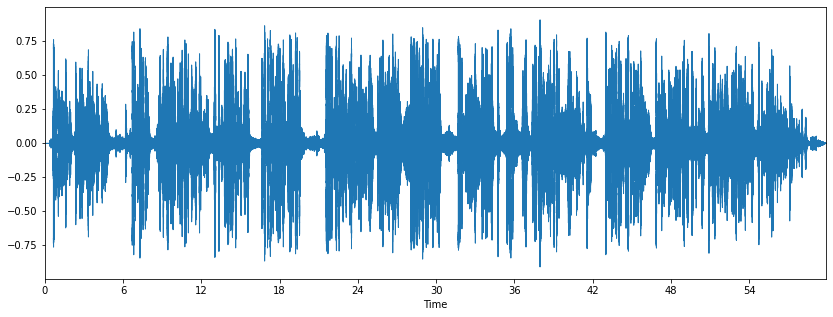

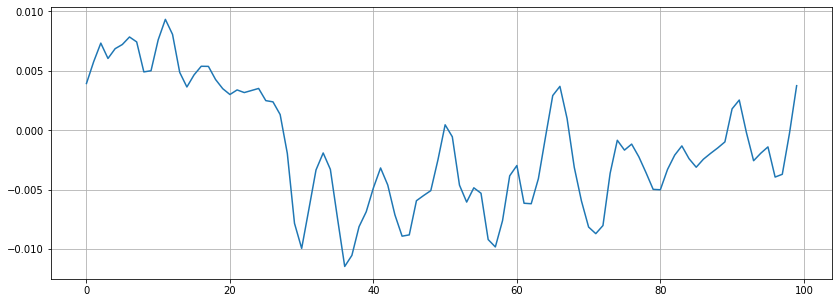

In [76]:
x, sr = librosa.load('/content/drive/MyDrive/Data Mining/bahagia.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

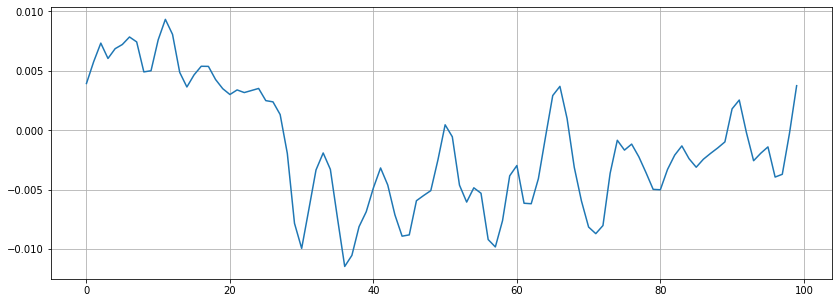

In [72]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [73]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16



8


Diliat dari grafik audio diatas diliat bahwa nol melintasi mama perlu menggunakan librosa

Mel-Frequency Cepstrum Coefficients (MFCC) adalah salah satu bentuk representasi cepstral dari sinyal dimana frekuensi didistribusi berdasarkan skala mel bukan secara pendekatan linear.

(20, 2580)


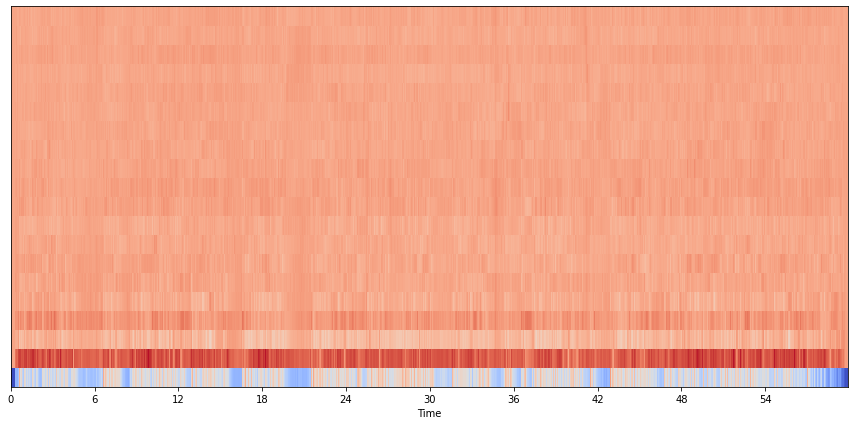

In [78]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[Text(0.5, 1.0, 'Chromagram')]

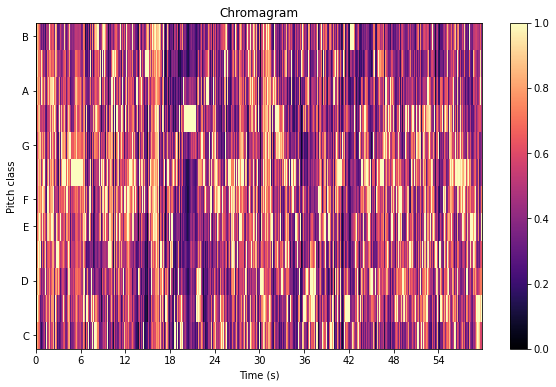

In [82]:
#Chroma feature, Sebuah fitur chroma atau vektor biasanya vektor fitur 12-unsur yang menunjukkan berapa banyak energi dari masing-masing kelas lapangan, {C, C #, D, D #, E, ..., B}, hadir dalam sinyal.

C = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=C, sr=sr)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='s', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')